#### Portfolio Optimisation Example
This notebook demonstrates a simplified workflow of the portfolio optimisation project, focusing on generating key plots.


1. Import Required Libraries

In [37]:
import os
import sys
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Add the project's source directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), "src")))

from src.data.fetch_data import fetch_data, compute_daily_returns
from src.optimisation.portfolio_opt import monte_carlo_optimisation, generate_efficient_frontier
from src.backtesting.backtest import backtest_portfolio, compute_portfolio_value


2. Load Configuration

In [38]:
tickers = ['BABA', 'BRK-B', 'HSBC', 'JPM', 'NKE', 'SAP', 'TSM']
start_date = '2021-01-01'
end_date = '2023-01-01'
risk_free_rate = 0.02
num_simulations = 1000

3. Fetch and Visualise Data

[*********************100%***********************]  7 of 7 completed


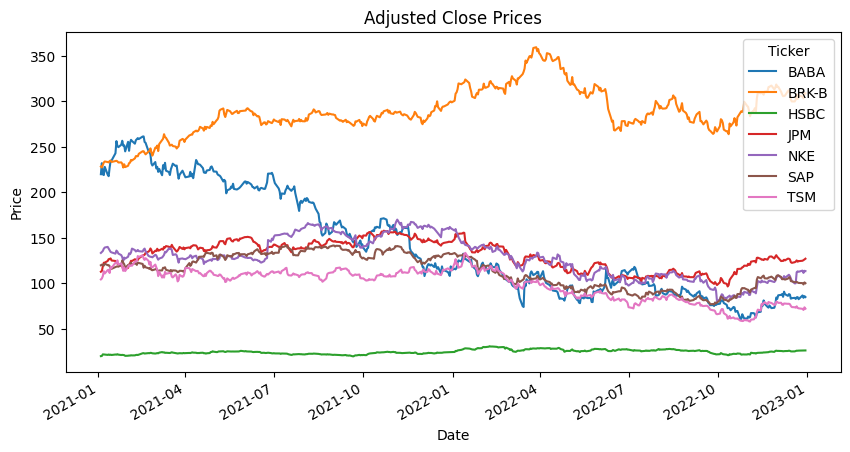

In [39]:
data = fetch_data(tickers, start_date, end_date)

# Plot adjusted close prices
data.plot(figsize=(10, 5), title="Adjusted Close Prices", ylabel="Price", xlabel="Date")
plt.show()

4. Compute Daily Returns and Correlation Matrix

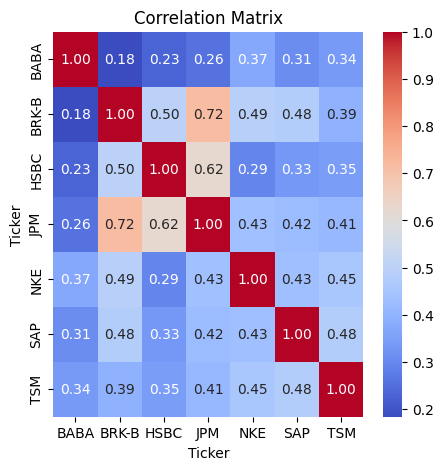

In [40]:
daily_returns = compute_daily_returns(data)

# Plot the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(daily_returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

5. Perform Portfolio Optimisation

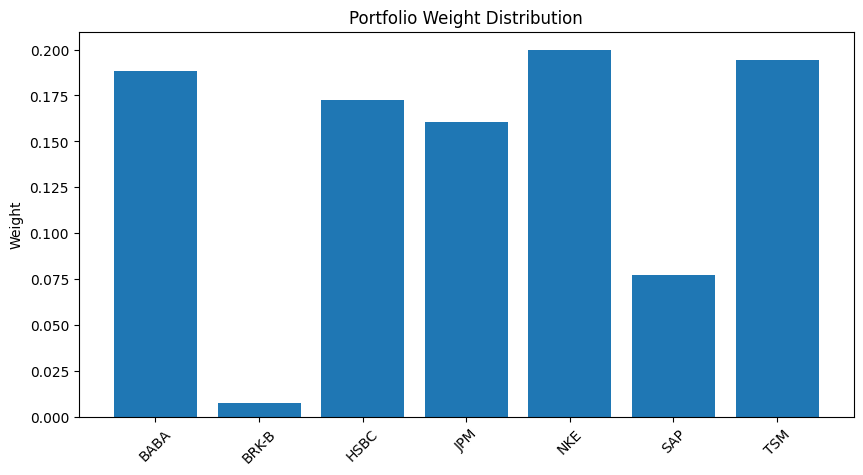

In [41]:
# Compute expected returns and covariance matrix
expected_return = daily_returns.mean()
covariance_matrix = daily_returns.cov()

# Optimise portfolio using Monte Carlo simulation
mc_results = monte_carlo_optimisation(expected_return, covariance_matrix, risk_free_rate, num_simulations)

# Find optimal portfolio
optimal_portfolio = mc_results.loc[mc_results["Sharpe_Ratio"].idxmax()]
optimal_weights = optimal_portfolio["Weights"]

# Plot weight distribution of the optimal portfolio
plt.figure(figsize=(10, 5))
plt.bar(tickers, optimal_weights)
plt.title("Portfolio Weight Distribution")
plt.ylabel("Weight")
plt.ylim(0, max(optimal_weights)+0.01)
plt.xticks(rotation=45)
plt.show()

6. Visualise Monte Carlo Results and Efficient Frontier

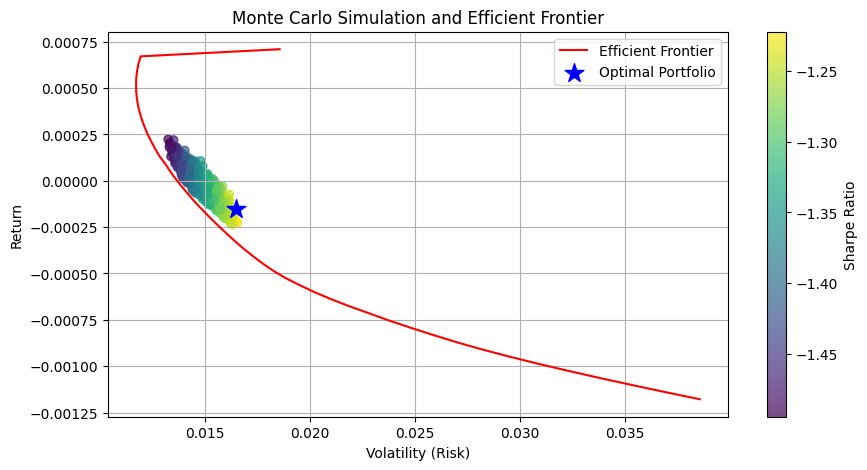

In [42]:
# Generate efficient frontier
frontier = generate_efficient_frontier(expected_return, covariance_matrix)

# Plot Monte Carlo results and efficient frontier
plt.figure(figsize=(10, 5))
plt.scatter(mc_results["Volatility"], mc_results["Returns"], c=mc_results["Sharpe_Ratio"], cmap="viridis", alpha=0.7)
plt.plot(frontier[:, 0], frontier[:, 1], color="red", label="Efficient Frontier")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(optimal_portfolio["Volatility"], optimal_portfolio["Returns"], color="blue", marker="*", s=200, label="Optimal Portfolio")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Return")
plt.title("Monte Carlo Simulation and Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()

7. Backtesting the Portfolio

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


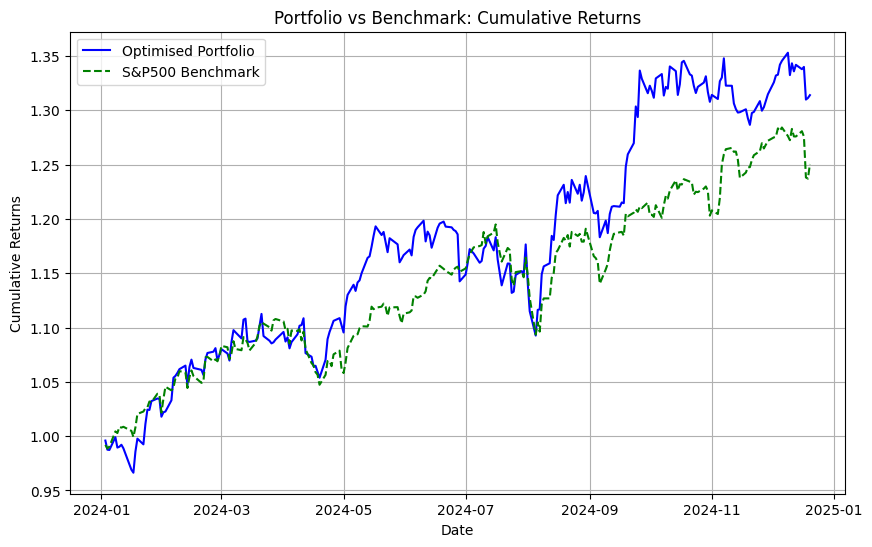

In [43]:
# Fetch backtesting data
backtest_start_date = '2024-01-01'
backtest_end_date = '2024-12-31'

# Fetch backtesting data
backtest_data = fetch_data(tickers, backtest_start_date, backtest_end_date)
backtest_daily_returns = compute_daily_returns(backtest_data)

# Perform backtest for the optimised portfolio
cumulative_returns = backtest_portfolio(optimal_weights, backtest_daily_returns)

# Fetch benchmark data
benchmark_symbol = "^GSPC"  # Example benchmark (S&P 500)
benchmark_data = fetch_data([benchmark_symbol], backtest_start_date, backtest_end_date)
benchmark_returns = compute_daily_returns(benchmark_data)
benchmark_cumulative = (1 + benchmark_returns[benchmark_symbol]).cumprod()

# Plot portfolio vs benchmark
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Optimised Portfolio", color="blue")
plt.plot(benchmark_cumulative, label=f"S&P500 Benchmark", linestyle="--", color="green")
plt.title("Portfolio vs Benchmark: Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

8. Compute Portfolio Value for a test investment

In [44]:
initial_investment = 1000  # Example initial investment
test_data = fetch_data(tickers, "2024-01-01", "2024-12-31")
test_returns = compute_daily_returns(test_data)

# Calculate final portfolio value and cumulative return
final_value, cumulative_return = compute_portfolio_value(optimal_weights, test_returns, initial_investment)

# Display the result
print(f"Your initial investment of £{initial_investment:.2f} would grow to £{final_value:.2f} over the testing period.")
print(f"Cumulative portfolio return: {cumulative_return * 100:.2f}%")

[*********************100%***********************]  7 of 7 completed

Your initial investment of £1000.00 would grow to £1313.88 over the testing period.
Cumulative portfolio return: 31.39%


In [45]:
# Calculate initial allocation and final returns for each stock
initial_allocation = optimal_weights * initial_investment
final_values = initial_allocation * cumulative_returns.iloc[-1]

print("Initial Allocation and Final Return:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: Invested £{initial_allocation[i]:.2f} -> Return £{final_values[i]:.2f}")


Initial Allocation and Final Return:
BABA: Invested £188.17 -> Return £247.23
BRK-B: Invested £7.56 -> Return £9.94
HSBC: Invested £172.70 -> Return £226.91
JPM: Invested £160.46 -> Return £210.83
NKE: Invested £199.79 -> Return £262.50
SAP: Invested £77.00 -> Return £101.16
TSM: Invested £194.32 -> Return £255.31
